## Setting the Interpreter's Current Directory to the Script's Root Directory

- In order to execute the `streamlit run` command, it's essential to ensure that the Python interpreter is directed to the location where `app.py` resides.

In [ ]:
import os
import sys

# Get the absolute path of the script python file
script_dir = os.path.dirname(os.path.abspath(sys.argv[0]))

# Change the current working directory
os.chdir(script_dir)

## Step 1 - Basic webpage setup

In [ ]:
import pandas as pd  # pip install pandas openpyxl
import plotly.express as px  # pip install plotly-express
import streamlit as st  # pip install streamlit

# emojis: https://www.webfx.com/tools/emoji-cheat-sheet/
st.set_page_config(page_title="Sales Dashboard", 
                   page_icon=":bar_chart:", # `:bar_chart:‵ is emoji code. 
                   layout="wide")

# ---- READ EXCEL ----
@st.cache_data # This will make the function run only once, and the website would store the data in the cache.
def get_data_from_excel():
    df = pd.read_excel(
        io="supermarkt_sales.xlsx",
        engine="openpyxl",
        sheet_name="Sales",
        skiprows=3,
        usecols="B:R",
        nrows=1000,
    )
    # Add 'hour' column to dataframe
    df["hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour
    return df

df = get_data_from_excel()

st.dataframe(df)

## Launching the Web Application

There are several methods available to launch a web application. In this tutorial, we will demonstrate how to do this using the terminal. If your terminal isn't open yet, you can enable it by pressing `Ctrl + Shift + P` and typing `Toggle Terminal`.

We will cover two methods to run the web application: using terminal commands and using a Python script.

### Run script method 1: Using Terminal Commands

There are two steps to follow in this method:

1. Open windows terminal or command prompt (for windows device) or python terminal (with `ctrl + shift + P` and search for `toggle terminal` to open terminal)
2. Shift the interpreter's directory to the root directory where your web application resides. Use the command `cd "...\prog-for-humanists\colabs\Unit 4b - Streamlit\step1"`, replacing the directory path with the absolute path of your file on your computer.

3. Execute the command `streamlit run app.py` to launch the application.

These steps are demonstrated as follow: 

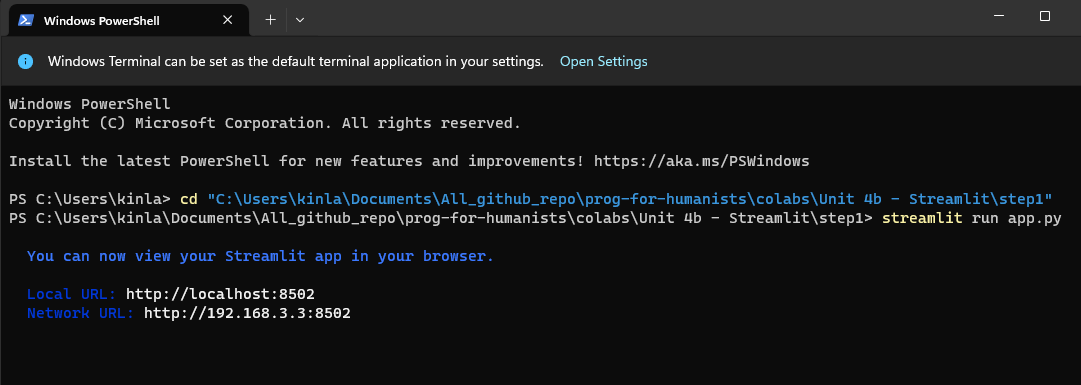

### Method 2: Running Scripts Using a Python Script

Python scripts offer another effective way to run terminal commands. This method involves writing all necessary commands into a Python script.

In this process, the function `os.chdir()` is used to replicate the `cd` command in the terminal, changing the current working directory. Similarly, `subprocess.run()` is used to execute custom commands in the terminal, serving as a Pythonic way to run these commands.

In [1]:
import os
import subprocess

# Change the current working directory
os.chdir('step1')

# Use subprocess to run the streamlit command
subprocess.run(['streamlit', 'run', 'app.py'])

## Method 3: Concatenate directory path and 

- We can also combine 2 actions into a single command and run it in any terminal.

Syntax is `streamlit run <dir>/app.py`. And example would be: 


In [ ]:
streamlit run "C:\Users\kinla\Documents\All_github_repo\prog-for-humanists\colabs\Unit 4b - Streamlit\step2\app.py

If it is successful, the website will pop up in your browser and show up its content.

We have `st.dataframe(df)` in the script so there will be a dataframe showing up in the webapp. 

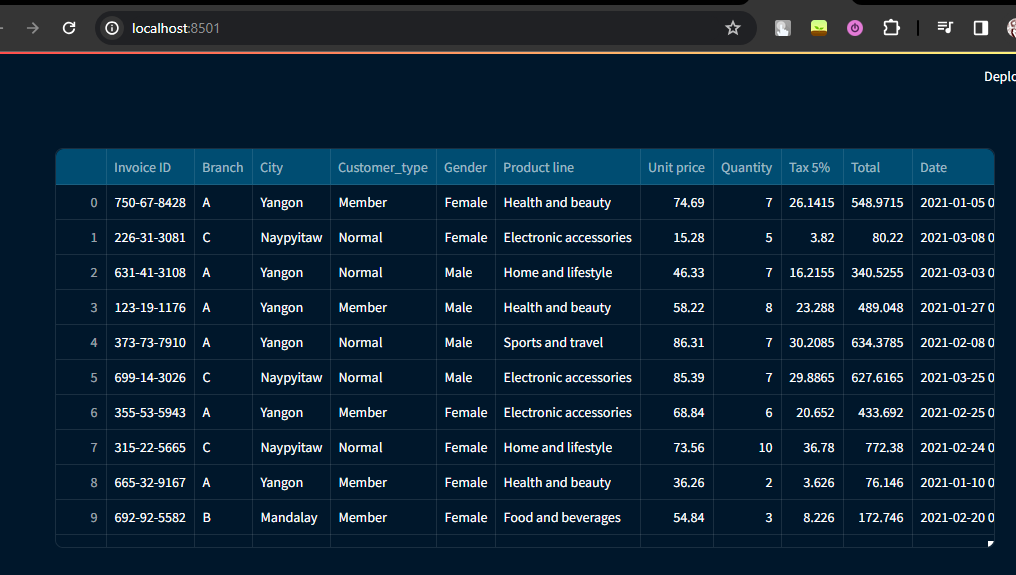

## Step 2: Adding sidebars

Documentation:
Sidebar class in streamlit:
https://docs.streamlit.io/library/api-reference/layout/st.sidebar

Multiselect in streamlit:
https://docs.streamlit.io/library/api-reference/widgets/st.multiselect



In [ ]:

# ---- SIDEBAR ----
st.sidebar.header("Please Filter Here:")

city = st.sidebar.multiselect(
    "Select the City:",
    options=df["City"].unique(),
    default=df["City"].unique()
)

customer_type = st.sidebar.multiselect(
    "Select the Customer Type:",
    options=df["Customer_type"].unique(),
    default=df["Customer_type"].unique(),
)

gender = st.sidebar.multiselect(
    "Select the Gender:",
    options=df["Gender"].unique(),
    default=df["Gender"].unique()
)

"""
In the final step,
we combine these logics together to filter the dataframe.
"""

df_selection = df.query(
    "City == @city & Customer_type ==@customer_type & Gender == @gender"
) # You can use `@` to refer to a variable. 


# Dealing with special cases 
# Check if the dataframe is empty:
if df_selection.empty:
    st.warning("No data available based on the current filter settings!")
    st.stop() # This will halt the app from further execution.



st.dataframe(df_selection)

After modified `app.py` with above setting, now the web app has a side bar. 

To see the changes, we turn on the web app again: 

(Update the directory path of this command if you think it is needed: )

In [ ]:
!streamlit run "C:\Users\kinla\Documents\All_github_repo\prog-for-humanists\colabs\Unit 4b - Streamlit\step2\app.py

Now a functional dashboard appears in the left hand side:

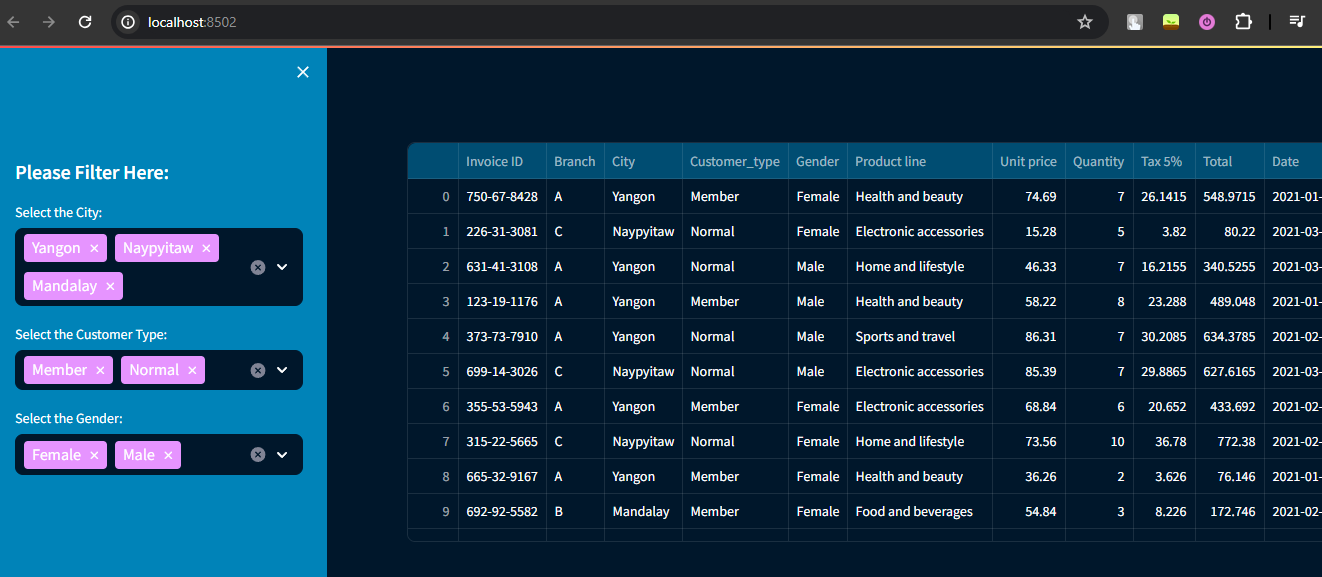

## Step 3: Adding a main-page 

Here we use `st.markdown` to create a markdown page as the main page of the webapp.

In [ ]:
# ---- MAINPAGE ----
st.title(":bar_chart: Sales Dashboard")
st.markdown("##") # `st.markdown` generated a markdown cell in streamlit.

# TOP KPI's
total_sales = int(df_selection["Total"].sum())
average_rating = round(df_selection["Rating"].mean(), 1)
star_rating = ":star:" * int(round(average_rating, 0))
average_sale_by_transaction = round(df_selection["Total"].mean(), 2)

# In the following, we create 3 columns in the main page to display the KPI's.

left_column, middle_column, right_column = st.columns(3)
with left_column:
    st.subheader("Total Sales:")
    st.subheader(f"US $ {total_sales:,}")
with middle_column:
    st.subheader("Average Rating:")
    st.subheader(f"{average_rating} {star_rating}")
with right_column:
    st.subheader("Average Sales Per Transaction:")
    st.subheader(f"US $ {average_sale_by_transaction}")

st.markdown("""---""") # this `st.markdown` generate another markdown cell, but also indicating the end of last markdown cell.


## Step 4: Creating barcharts for the web app.

In [ ]:

# SALES BY PRODUCT LINE [BAR CHART]
sales_by_product_line = df_selection.groupby(by=["Product line"])[["Total"]].sum().sort_values(by="Total")
fig_product_sales = px.bar(
    sales_by_product_line,
    x="Total",
    y=sales_by_product_line.index,
    orientation="h",
    title="<b>Sales by Product Line</b>",
    color_discrete_sequence=["#0083B8"] * len(sales_by_product_line),
    template="plotly_white",
)
fig_product_sales.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=(dict(showgrid=False))
)

# SALES BY HOUR [BAR CHART]
sales_by_hour = df_selection.groupby(by=["hour"])[["Total"]].sum()
fig_hourly_sales = px.bar(
    sales_by_hour,
    x=sales_by_hour.index,
    y="Total",
    title="<b>Sales by hour</b>",
    color_discrete_sequence=["#0083B8"] * len(sales_by_hour),
    template="plotly_white",
)
fig_hourly_sales.update_layout(
    xaxis=dict(tickmode="linear"),
    plot_bgcolor="rgba(0,0,0,0)",
    yaxis=(dict(showgrid=False)),
)


left_column, right_column = st.columns(2)
left_column.plotly_chart(fig_hourly_sales, use_container_width=True)
right_column.plotly_chart(fig_product_sales, use_container_width=True)


Now, the chart appears in the webapp: 

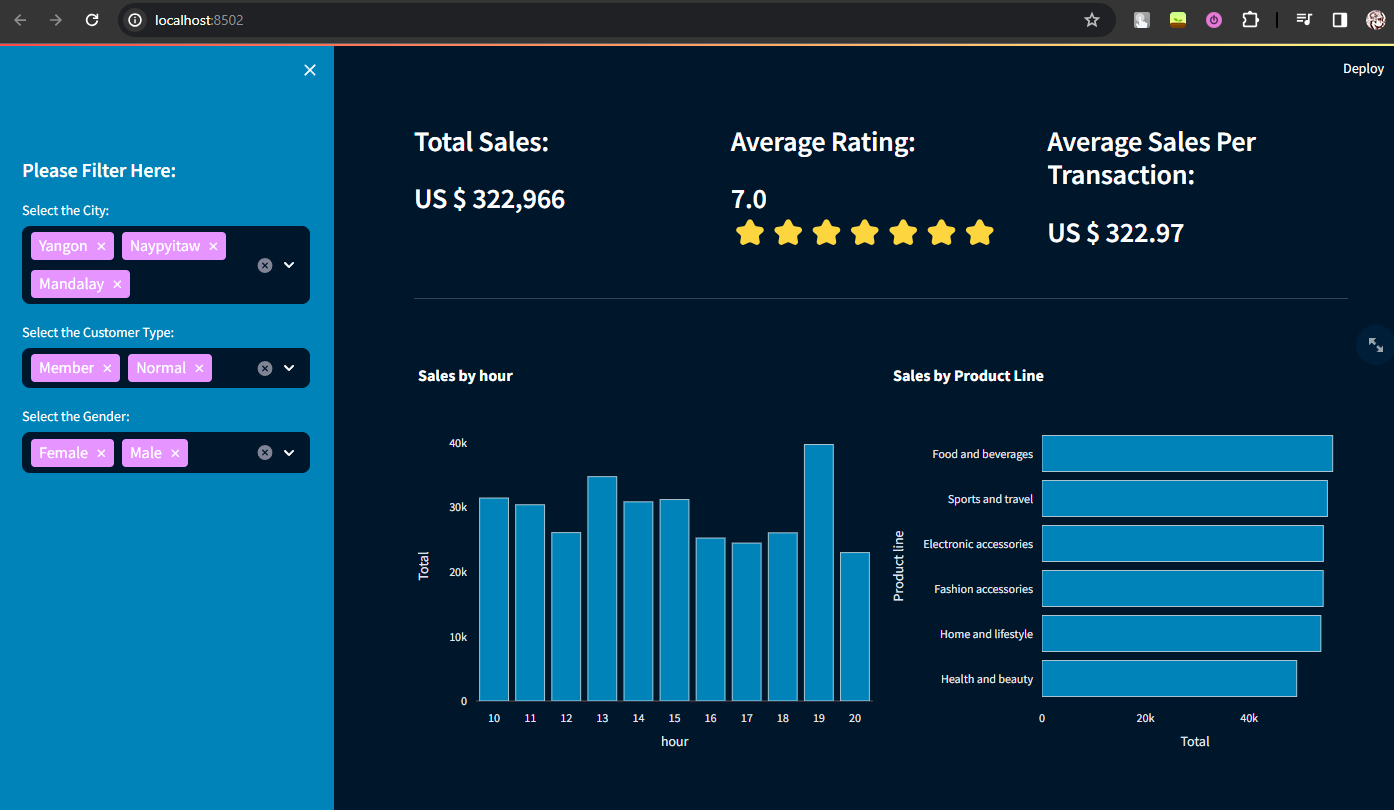

## Step 5: Customize the style of the web app

In [ ]:
# ---- HIDE STREAMLIT STYLE ----
hide_st_style = """
            <style>
            #MainMenu {visibility: hidden;}
            footer {visibility: hidden;}
            header {visibility: hidden;}
            </style>
            """
st.markdown(hide_st_style, unsafe_allow_html=True)

Now, the style of the webapp have been updated: 

- Mainmenu botton is hidden
- Footer is hidden
- Header is hidden

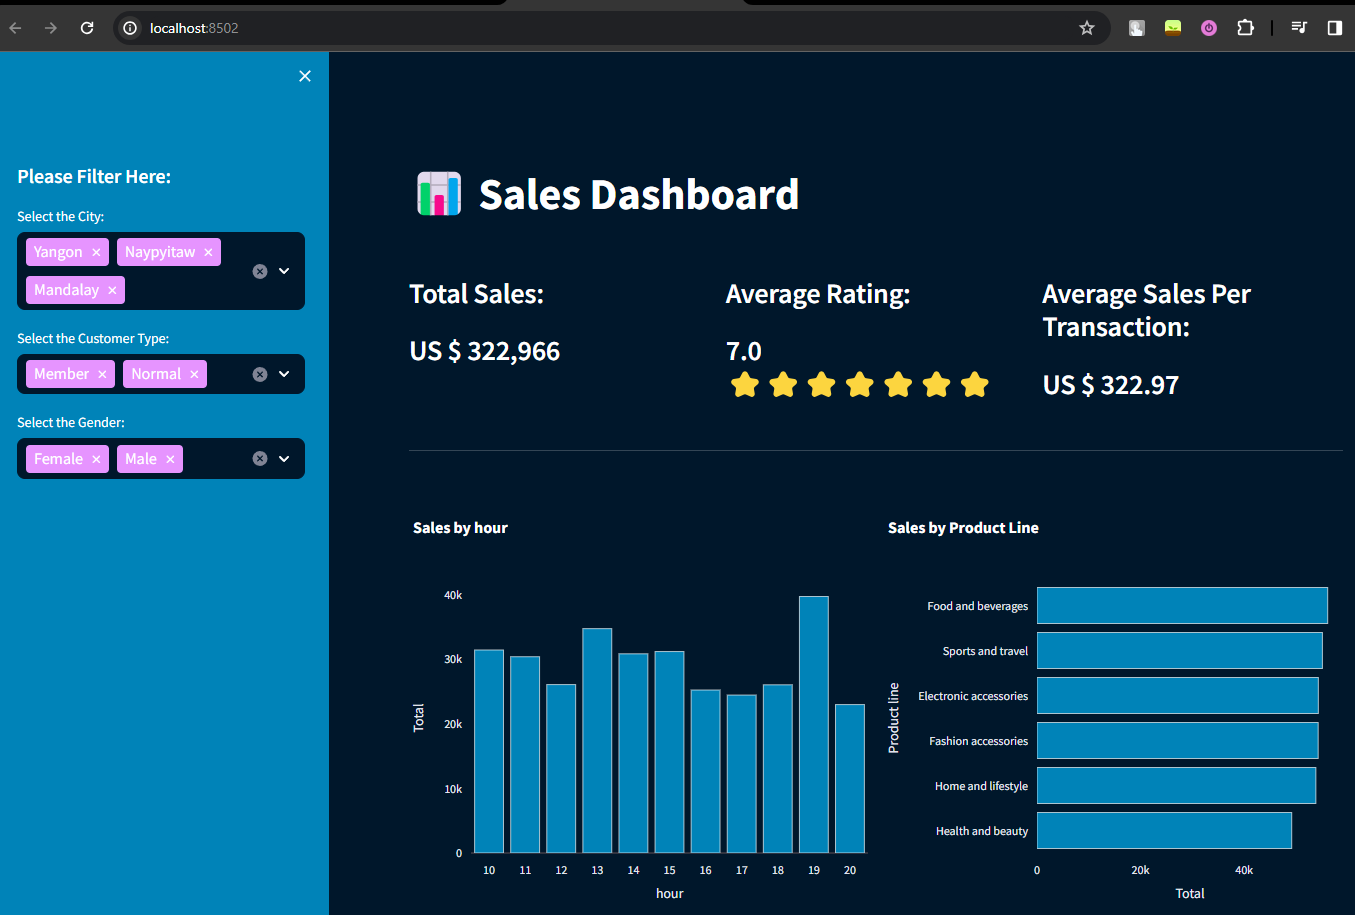